# Fraud Detection 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('Downloads\Fraud.csv')

In [ ]:
#loading the dataset
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Printing the last 5 rows
dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
#Getting the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## features of our dataset

step- Steps represent the day a transaction happened. There are 743 steps in total

type- Type represents the type of payment done which consists values like payment, debit, transfer, cash_out, cash_in

amount- Represents the value of the transactions.

nameOrig- This is the unique id of every customer which starts with the letter C and is followed by unique sequence of numbers.

oldbalanceOrg- initial balance

newbalanceOrg- balance after transaction

nameDest- Recipient of the transaction which is a unique value

oldBalanceDest- initial balance of the recipient

newbalanceDest- new balance after of the recipent after transaction

isFraud- Checks for fraud and non fraud transactions

isFlaggedFraud- if there is an illegal attempt


In [ ]:
# Checking the number of missing values in each coloumn 
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no missing values in this dataset

In [ ]:
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Here 0 represents normal transactions 
1 represents fradulent transactions

In [ ]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


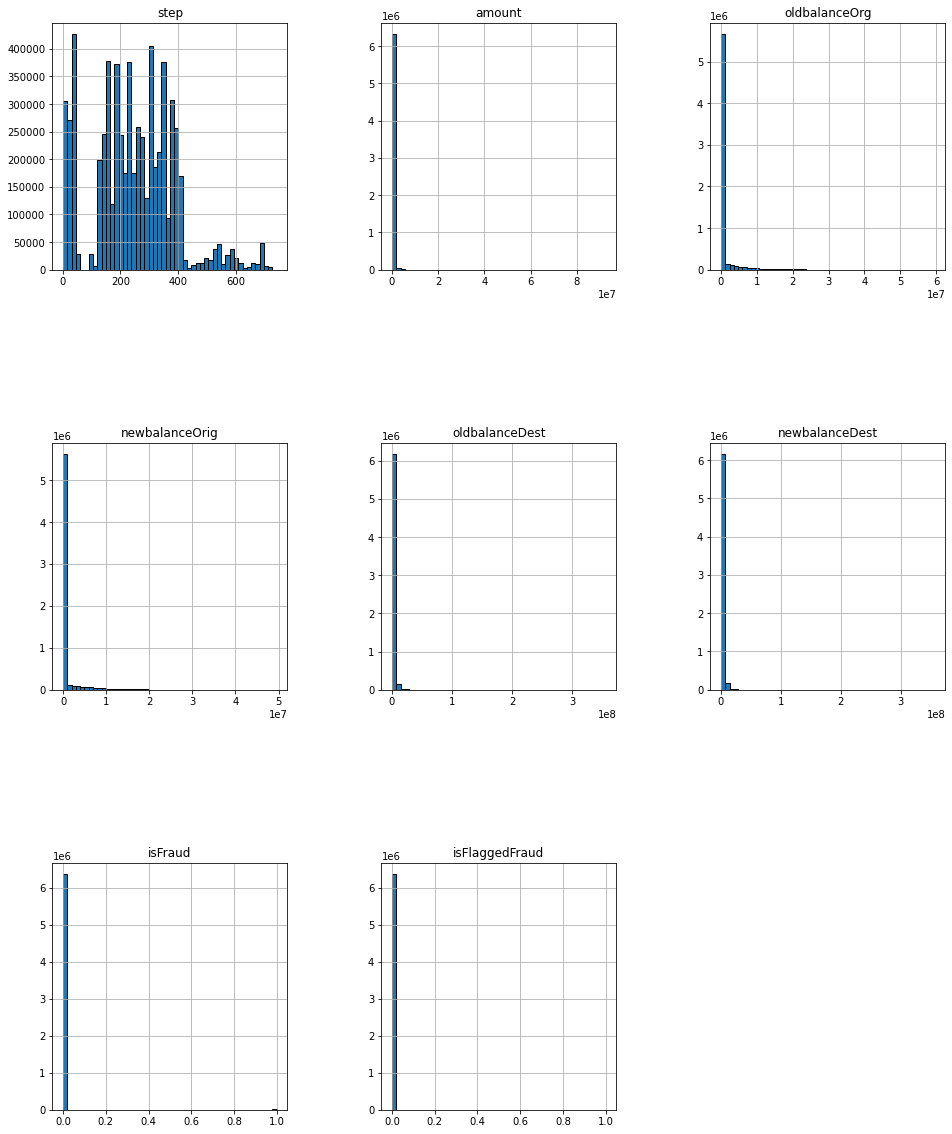

In [ ]:
dataset.hist(figsize=(16, 20), bins=50, edgecolor='Black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
# Check for unique values in the dataset
for column in dataset.columns:
  print(column, len(dataset[column].unique()), dataset[column].unique())

step 743 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

In [ ]:
dataset['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

The unique values from the coloumn 'type'

### Checking for outliers

In [ ]:
dataset['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

C:\Users\Vibha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


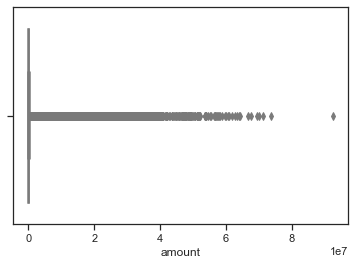

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(dataset.amount)
plt.show()

In [ ]:
max(dataset.amount)

92445516.64

In [ ]:
dataset[dataset.amount>85000000.00].shape

(1, 11)

In [ ]:
#remove the outlier
dataset = dataset[dataset.amount<80000000]

In [ ]:
dataset[dataset.amount>80000000].shape

(0, 11)

In [ ]:
max(dataset.amount)

73823490.36

There was a huge difference between the max value and the 50 percentile value.

The boxplot also shows us that an outlier is present.

#### We will further analyse the data through data visualization  

<AxesSubplot:>

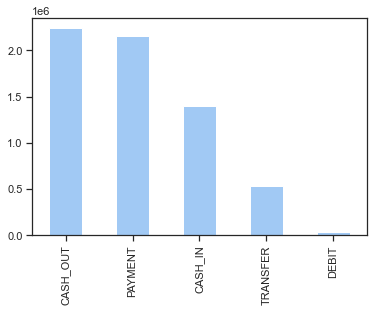

In [ ]:
dataset.type.value_counts().plot.bar()

In [ ]:
dataset['isFraud'].value_counts()

0    6354406
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:>

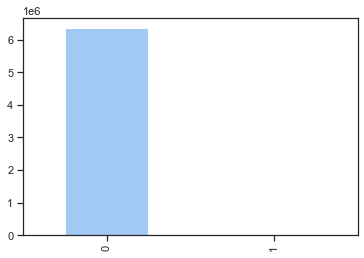

In [ ]:
dataset['isFraud'].value_counts().plot.bar()

In [ ]:
dataset['isFlaggedFraud'].value_counts()

0    6362603
1         16
Name: isFlaggedFraud, dtype: int64

<AxesSubplot:>

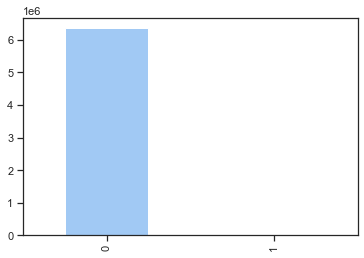

In [ ]:
dataset['isFlaggedFraud'].value_counts().plot.bar()

In [ ]:
#Seperating normal and fraud data
normal = dataset[dataset.isFraud == 0]
fraud = dataset[dataset.isFraud == 1]

In [ ]:
print(normal.shape)
print(fraud.shape)

(6354406, 11)
(8213, 11)


Our dataset is imbalanced

In [ ]:
normal.amount.describe()

count    6.354406e+06
mean     1.781825e+05
std      5.951125e+05
min      1.000000e-02
25%      1.336839e+04
50%      7.468468e+04
75%      2.083646e+05
max      7.382349e+07
Name: amount, dtype: float64

In [ ]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
dataset.groupby('type')['isFraud','isFlaggedFraud'].sum()

C:\Users\Vibha\AppData\Local\Temp\ipykernel_4776\451964714.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby('type')['isFraud','isFlaggedFraud'].sum()


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


####  With this we come to know fraud occurs only in  CASH_OUT and TRANSFER

This is a key factor to predict fradulent customer 

In [ ]:
# Merchant flag for source and dist
dataset['OrigC']=dataset['nameOrig'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
dataset['DestC']=dataset['nameDest'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
fraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
fraudCashout = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]
print(len(fraudTransfer))
print(len(fraudCashout))

4097
4116


In [ ]:
# droping those feature which are category and used as feature extraction
droplist=['isFlaggedFraud','type','nameDest','nameOrig']

Fraud data from TRANSFER : 4097

Fraud data from CASH_OUT : 4116



In [ ]:
new_dataset = dataset.drop(labels=droplist,axis=1)
X=new_dataset.drop('isFraud',axis=1)
Y=new_dataset.isFraud

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42, shuffle=False)


Logistic Regression - We use logistic regression for binary classification problems 

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.9991209818598946


In [ ]:
# Accuracy on test data.
X_test_prediction = model.predict(X_test )
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy score on test data: ', test_data_accuracy)

Accuracy score on test data:  0.9980228270743813
